## Project Description
Projek yang akan dilakukan kali ini adalah menganalisis sebuah dataset Instansi Bank di Portugal. Pada projek ini akan dilakukan penerapan algoritma machine learning seperti Linear Regression, Naive Bayes, dan lainnya.

### Melakukan Persiapan dan Import Library

In [525]:
# Library untuk memproses data
import pandas as pd
import numpy as np

# Library untuk plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Library algoritma machine learning dan data training
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


# Library analisis fitur
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2,mutual_info_classif
from sklearn.decomposition import PCA


### Data Loading

In [526]:
df_bank = pd.read_excel('dataset/bank-full.xlsx')
# df_bank = pd.read_excel('dataset/bank-additional.xlsx')

In [527]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Data Understanding

In [528]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [529]:
df_bank.shape

(45211, 17)

In [530]:
df_bank.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


### Data Cleaning

In [531]:
# Mendeteksi adanya data 'unknown'
cat_col = list(df_bank.select_dtypes(include=['object']))
df_bank[
    df_bank[cat_col]=='unknown'
].count().sort_values(ascending=False)

poutcome     36959
contact      13020
education     1857
job            288
month            0
previous         0
pdays            0
campaign         0
duration         0
age              0
day              0
loan             0
housing          0
balance          0
default          0
marital          0
y                0
dtype: int64

In [532]:
# Mengubah value unknow menjadi nan
df_bank[
    df_bank[cat_col]=="unknown"
] = np.nan

In [533]:
# Mengecek unstandard missing value pada kolom numerik
num_col = list(df_bank.select_dtypes(include=['int64']).columns.values) + list(df_bank.select_dtypes(include=['float64']).columns.values)
for num_cols in num_col:
    print("Nilai unik untuk kolom ", num_cols.upper())
    print(df_bank[num_cols].unique())
    print('='*30)

Nilai unik untuk kolom  AGE
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
Nilai unik untuk kolom  BALANCE
[ 2143    29     2 ...  8205 14204 16353]
Nilai unik untuk kolom  DAY
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
Nilai unik untuk kolom  DURATION
[ 261  151   76 ... 1298 1246 1556]
Nilai unik untuk kolom  CAMPAIGN
[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
Nilai unik untuk kolom  PDAYS
[ -1 151 166  91  86 143 147  89 140 176 101 174 170 167 195 165 129 188
 196 172 118 119 104 171 117 164 132 131 123 159 186 111 115 116 173 178
 110 152  96 103 150 175 193 181 185 154 145 138 126 180 109 158 168  97
 182 127 130 194 125 105 102  26 179  28

In [534]:
# Mengganti value abnormal pada kolom PDAYS
df_bank['pdays'].replace(999,0,inplace=True)

In [535]:
# Mengecek missing value dari keseluruhan data
df_bank.isnull().sum().sum()

52124

### Dealing with Missing Value

In [536]:
# categorical data
bank_df_categorical = df_bank[cat_col]

# numerical data
bank_df_numerical = df_bank[num_col]

In [537]:
# Menggunakan SimpleImputer untuk mengisi missing value
imputer_categorical = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [538]:
imputer_categorical.fit(bank_df_categorical)

SimpleImputer(strategy='most_frequent')

In [539]:
# Transormasi ke data
bank_df_categorical = imputer_categorical.transform(bank_df_categorical)

# Membuat dataframe untuk menyimpan hasil impute
bank_df_categorical = pd.DataFrame(bank_df_categorical,columns=cat_col)

In [540]:
# Lakukan concate setelahnya
df_bank = pd.concat([bank_df_numerical,bank_df_categorical],axis=1)

In [541]:
df_bank.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,58,2143,5,261,1,-1,0,management,married,tertiary,no,yes,no,cellular,may,failure,no
1,44,29,5,151,1,-1,0,technician,single,secondary,no,yes,no,cellular,may,failure,no
2,33,2,5,76,1,-1,0,entrepreneur,married,secondary,no,yes,yes,cellular,may,failure,no
3,47,1506,5,92,1,-1,0,blue-collar,married,secondary,no,yes,no,cellular,may,failure,no
4,33,1,5,198,1,-1,0,blue-collar,single,secondary,no,no,no,cellular,may,failure,no


In [542]:
# Melakukan rename atribut
df_bank.rename(columns={
    'balance' : 'Balance',
    'day' : 'Day',
    'housing' : 'Housing_Rent',
    'job':'Job',
    'marital':'Marital',
    'education':'Education',
    'default':'Credit_Default',
    'loan':'Loan',
    'contact':'Contact',
    'month':'Last_Month_Contact',
    'poutcome':'Outcome',
    'y':'Deposito',
    'age':'Age',
    'duration':'Last_Contact_Duration',
    'campaign':'Total_Campaign',
    'pdays':'PDays',
    'previous':'Previous_Total_Contact',
},inplace=True)

In [543]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     45211 non-null  int64 
 1   Balance                 45211 non-null  int64 
 2   Day                     45211 non-null  int64 
 3   Last_Contact_Duration   45211 non-null  int64 
 4   Total_Campaign          45211 non-null  int64 
 5   PDays                   45211 non-null  int64 
 6   Previous_Total_Contact  45211 non-null  int64 
 7   Job                     45211 non-null  object
 8   Marital                 45211 non-null  object
 9   Education               45211 non-null  object
 10  Credit_Default          45211 non-null  object
 11  Housing_Rent            45211 non-null  object
 12  Loan                    45211 non-null  object
 13  Contact                 45211 non-null  object
 14  Last_Month_Contact      45211 non-null  object
 15  Ou

### Visualisasi Data

#### Melihat Pelanggan Deposito Berdasarkan Pekerjaan

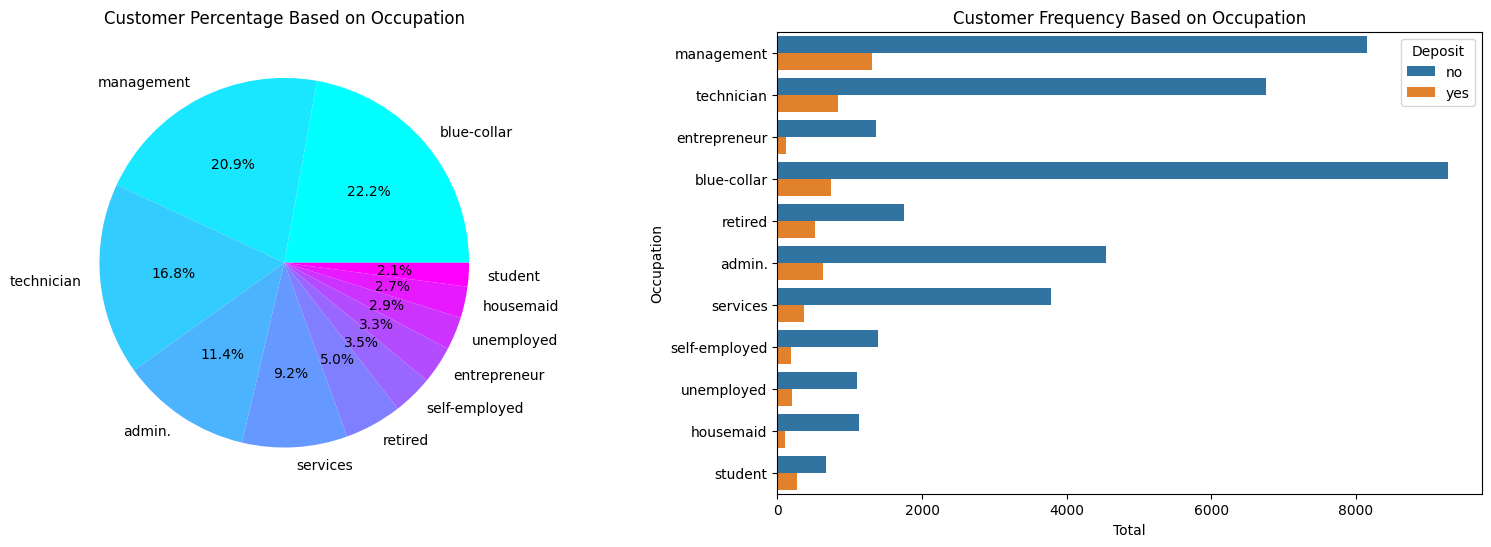

In [544]:
fig, ax = plt.subplots(1,2,figsize=(20,6))

# Persentase Pelanggan Deposito
df_bank['Job'].value_counts().plot(
    kind='pie', 
    ax=ax[0], 
    autopct='%.1f%%',
    cmap='cool',
)
ax[0].set_title('Customer Percentage Based on Occupation')
ax[0].set_ylabel('')

# Frekuensi pelanggan deposito
sns.countplot(
    y='Job',
    hue='Deposito',
    data=df_bank
)
ax[1].set_title('Customer Frequency Based on Occupation')
ax[1].set_ylabel('Occupation')
ax[1].set_xlabel('Total')
ax[1].legend(title='Deposit')

#### Melihat Pelanggan Deposito Berdasarkan Status Pernikahan

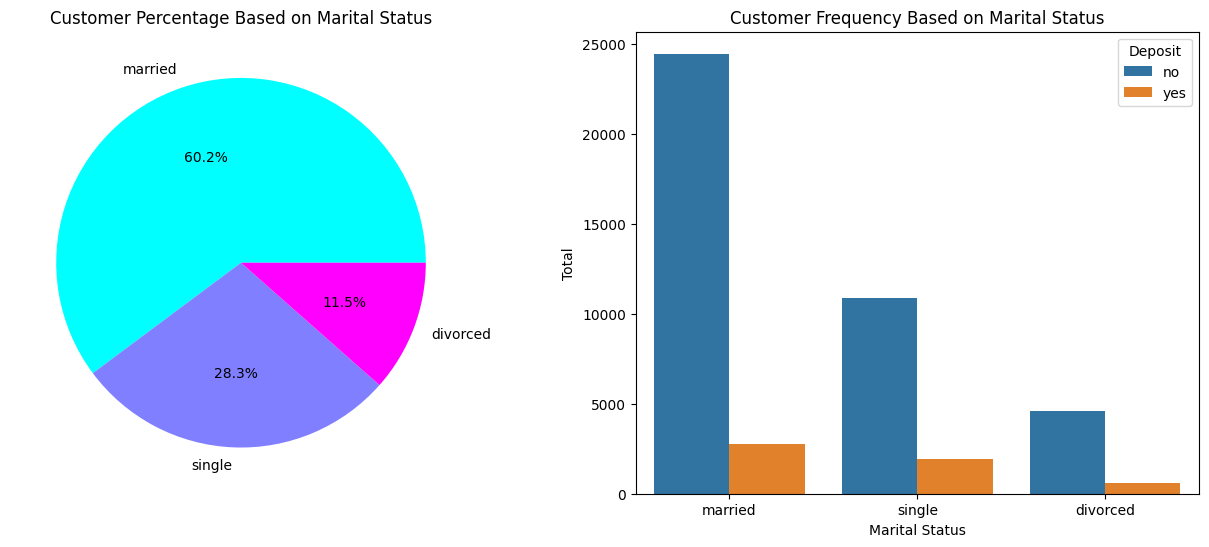

In [545]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

# Persentase pelanggan deposito
df_bank['Marital'].value_counts().plot(
    kind='pie', 
    ax=ax[0], 
    autopct='%.1f%%',
    cmap='cool',
)
ax[0].set_title('Customer Percentage Based on Marital Status')
ax[0].set_ylabel('')

# Frekuensi pelanggan deposito
sns.countplot(
    x='Marital',
    hue='Deposito',
    data=df_bank
)
ax[1].set_title('Customer Frequency Based on Marital Status')
ax[1].set_ylabel('Total')
ax[1].set_xlabel('Marital Status')
ax[1].legend(title='Deposit')

### Data Pre-processing

In [546]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     45211 non-null  int64 
 1   Balance                 45211 non-null  int64 
 2   Day                     45211 non-null  int64 
 3   Last_Contact_Duration   45211 non-null  int64 
 4   Total_Campaign          45211 non-null  int64 
 5   PDays                   45211 non-null  int64 
 6   Previous_Total_Contact  45211 non-null  int64 
 7   Job                     45211 non-null  object
 8   Marital                 45211 non-null  object
 9   Education               45211 non-null  object
 10  Credit_Default          45211 non-null  object
 11  Housing_Rent            45211 non-null  object
 12  Loan                    45211 non-null  object
 13  Contact                 45211 non-null  object
 14  Last_Month_Contact      45211 non-null  object
 15  Ou

In [547]:
# Mengelompokkan data berdasarkan tipedata
numerical_columns = list(df_bank.select_dtypes(include=['int64']).columns.values) + list(df_bank.select_dtypes(include=['float64']).columns.values)
categorical_columns = list(df_bank.select_dtypes(include=['object']))

In [548]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     45211 non-null  int64 
 1   Balance                 45211 non-null  int64 
 2   Day                     45211 non-null  int64 
 3   Last_Contact_Duration   45211 non-null  int64 
 4   Total_Campaign          45211 non-null  int64 
 5   PDays                   45211 non-null  int64 
 6   Previous_Total_Contact  45211 non-null  int64 
 7   Job                     45211 non-null  object
 8   Marital                 45211 non-null  object
 9   Education               45211 non-null  object
 10  Credit_Default          45211 non-null  object
 11  Housing_Rent            45211 non-null  object
 12  Loan                    45211 non-null  object
 13  Contact                 45211 non-null  object
 14  Last_Month_Contact      45211 non-null  object
 15  Ou

In [549]:
nominal_columns = ['Job', 'Education', 'Contact', 'Last_Month_Contact', 'Outcome']
ordinal_columns = [col for col in categorical_columns if col not in nominal_columns]

In [550]:
# Menggunakan OneHot Encoding
df_bank_onehot = pd.get_dummies(df_bank[nominal_columns], columns=nominal_columns, prefix=nominal_columns)

In [551]:
# Label encoding untuk atribut ordinal
bank_df_label = df_bank.loc[:,ordinal_columns]
encoder = LabelEncoder()

In [552]:
for col in ordinal_columns:
    bank_df_label[col] = encoder.fit_transform(bank_df_label[col])

In [553]:
# Concat hasil encoding kedua data
bank_df_categorical_encoded = pd.concat([df_bank_onehot,bank_df_label],axis=1)

In [554]:
bank_df_categorical_encoded.head()

,Job_admin.,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,...,Last_Month_Contact_oct,Last_Month_Contact_sep,Outcome_failure,Outcome_other,Outcome_success,Marital,Credit_Default,Housing_Rent,Loan,Deposito
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,2,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,2,0,0,0,0


In [555]:
# Melakukan concat kolom numerikal dengan hasil encoding
bank_df = pd.concat([df_bank[numerical_columns],bank_df_categorical_encoded],axis=1)

In [556]:
# Memisahkan atribut target
X = bank_df.drop('Deposito',axis=1)
y = bank_df['Deposito']

In [557]:
# Data split, test, train
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Naive Bayes

In [558]:
nb=GaussianNB()
nb.fit(X_train,y_train)
print("accuracy of naive bayes:",nb.score(X_test,y_test))

accuracy of naive bayes: 0.8476169412805485


Optimal CV Value: 2


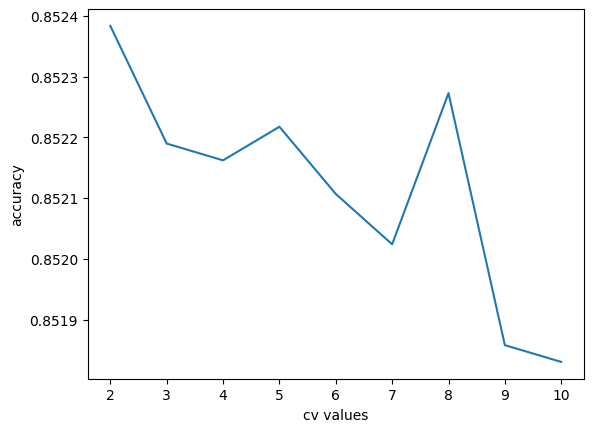

In [559]:
score_list = []
for cv in range(2, 11):
    nb_tuning =GaussianNB()
    accuracies = cross_val_score(estimator=nb_tuning, X=X_train,y=y_train, cv=cv)
    mean_accuracy = np.mean(accuracies)
    score_list.append(mean_accuracy)
best_cv = np.argmax(score_list) + 2
print("Optimal CV Value:", best_cv)
    
plt.plot(range(2,11),score_list)
plt.xlabel("cv values")
plt.ylabel("accuracy")
plt.show()

In [560]:
accuracies = cross_val_score(nb_tuning, X=X_train,y=y_train, cv=3)
accuracies

array([0.85136032, 0.85160916, 0.85359987])

In [561]:
accuracies = cross_val_score(nb_tuning, X=X_train,y=y_train, cv=3)
print("mean_accuracy:", np.mean(accuracies))
print("mean_std:",np.std(accuracies))
nb_tuning.fit(X_train,y_train)
print("test accuracy:",nb_tuning.score(X_test,y_test))

mean_accuracy: 0.8521897810218978
mean_std: 0.0010022433621097177
test accuracy: 0.8476169412805485


## Logistic Regression

In [562]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
print("accuracy of logistic regression:",lr.score(X_test,y_test))

accuracy of logistic regression: 0.886873825058056


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Optimal CV Value: 6


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


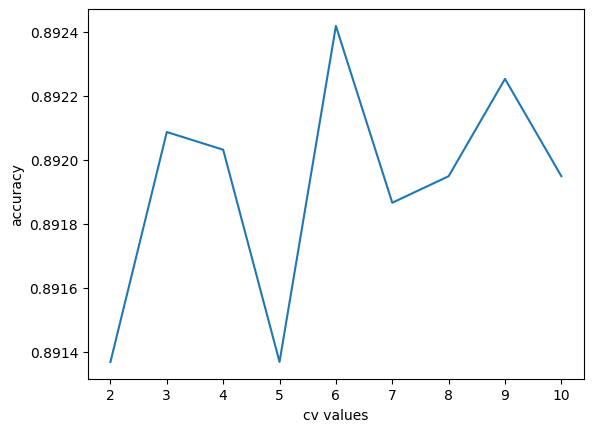

In [563]:
score_list = []
for cv in range(2, 11):
    lr_tuning =LogisticRegression()
    accuracies = cross_val_score(estimator=lr_tuning, X=X_train,y=y_train, cv=cv)
    mean_accuracy = np.mean(accuracies)
    score_list.append(mean_accuracy)
best_cv = np.argmax(score_list) + 2
print("Optimal CV Value:", best_cv)

plt.plot(range(2,11),score_list)
plt.xlabel("cv values")
plt.ylabel("accuracy")
plt.show()

In [564]:
accuracies = cross_val_score(lr_tuning, X=X_train,y=y_train, cv=10)
accuracies

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

array([0.89079348, 0.88913464, 0.89106995, 0.89024053, 0.88747581,
       0.89383467, 0.8885817 , 0.89798175, 0.89380531, 0.8965708 ])

In [565]:
accuracies = cross_val_score(lr_tuning, X=X_train,y=y_train, cv=10)
print("mean_accuracy:", np.mean(accuracies))
print("mean_std:",np.std(accuracies))
lr_tuning.fit(X_train,y_train)
print("test accuracy:",lr_tuning.score(X_test,y_test))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

mean_accuracy: 0.891948863038601
mean_std: 0.003302307679213863
test accuracy: 0.886873825058056


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
